<a href="https://colab.research.google.com/github/dangtrantrung/TensorFlow_Keras/blob/master/TensorFlow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
print(keras.__version__)

2.15.0


In [ ]:
import tensorflow
from tensorflow import keras
print(keras)

<KerasLazyLoader>


In [ ]:
import tensorflow  as tf
# Conv2D
input_shape=(4,30,30,3)
x=tf.random.normal(input_shape)
y=tf.keras.layers.Conv2D(2,3,activation='relu',input_shape=input_shape[1:])(x)
print(y.shape)


(4, 28, 28, 2)


In [ ]:
# CNN model
inputs=keras.layers.Input(shape=[32,32,3])
x=keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(inputs)
x=keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(x)
predictions=keras.layers.MaxPool2D(pool_size=2)(x)

model=keras.Model(inputs=inputs,outputs=predictions)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144 (39.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
predictions.shape

TensorShape([None, 16, 16, 32])

In [ ]:
inputs.shape

TensorShape([None, 32, 32, 3])

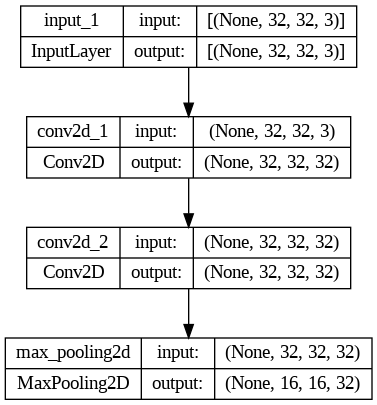

In [ ]:
keras.utils.plot_model(model,'model.png',show_shapes=True)

In [ ]:
# Model Sequential
model_v1=tf.keras.Sequential([
    keras.layers.Dense(1024,input_dim=64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256),
    keras.layers.Activation('softmax')]
)

In [ ]:
model_v1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              66560     
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
Total params: 328960 (1.25 MB)
Trainable params: 328960 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_v1.inputs

[<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_input')>]

In [ ]:
model_v1.outputs

[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'activation_1')>]

In [ ]:
model_v2=tf.keras.Sequential()
model_v2.add( keras.layers.Dense(1024,input_dim=64))
model_v2.add( keras.layers.Activation('relu'))
model_v2.add(keras.layers.Dense(256,activation='softmax',kernel_initializer='random_normal'))
model_v2.add(keras.layers.Dense(10,activation='softmax',kernel_initializer='random_normal'))

model_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              66560     
                                                                 
 activation_2 (Activation)   (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               262400    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 331530 (1.26 MB)
Trainable params: 331530 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_v2.compile(optimizer='SGD',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np

In [ ]:
# Sample Data

data=np.random.random((2000,64))
label=np.random.random((2000,10))

valid_data=np.random.random((500,64))
valid_label=np.random.random((500,10))

test_data=np.random.random((500,64))
test_label=np.random.random((500,10))


In [ ]:
data.shape, type(model_v2)

((2000, 64), keras.src.engine.sequential.Sequential)

In [ ]:
model_v2.fit(data, label, epochs=100, batch_size=50, validation_data=(valid_data, valid_label))

Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 11.5216 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5216 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5215 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5215 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5217 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5215 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5213 - accuracy: 0.1155 - val_loss: 11.5311 - val_accuracy: 0.1020

In [ ]:
model_v2.evaluate(test_data,test_label)

16/16 [==============================] - 0s 3ms/step - loss: 11.5622 - accuracy: 0.0940


[11.562179565429688, 0.09399999678134918]

In [ ]:
results=model_v2.predict(test_data)

16/16 [==============================] - 0s 2ms/step


In [ ]:
results.shape

(500, 10)

In [ ]:
results[0:10][0]

array([0.10204957, 0.09569108, 0.09571774, 0.10301384, 0.10824418,
       0.1067678 , 0.09315227, 0.10114346, 0.09758276, 0.09663732],
      dtype=float32)

In [ ]:
test_label[0:10][0]

array([0.50744851, 0.22098103, 0.46882194, 0.78210094, 0.05660426,
       0.90250769, 0.03908042, 0.65567298, 0.64171387, 0.82318734])

### KERAS FUNCTIONAL API

In [2]:
import tensorflow  as tf

mnist=tf.keras.datasets.mnist
(X_mnist_train,y_mnist_train),(X_mnist_test,y_mnist_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_mnist_train.shape,X_mnist_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
set(y_mnist_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [5]:
def normalize_grayscale(image_data):
  a=0.1
  b=0.9
  image_data_min=image_data.min()
  image_data_max=image_data.max()
  return a+((image_data-image_data_min)*(b-a))/(image_data_max-image_data_min)
train_mnist_features=normalize_grayscale(X_mnist_train)
test_mnist_features=normalize_grayscale(X_mnist_test)

In [6]:
train_mnist_features[0],test_mnist_features[0]

(array([[0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       ],
        [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       ],
        [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.

In [11]:
inputs=tf.keras.Input(shape=(28,28))
# 28 x 28 = 784 node - pixels
flatten_layer=tf.keras.layers.Flatten()
flatten_ouput=flatten_layer(inputs)
dense_layer=tf.keras.layers.Dense(50,activation='relu')
dense_output=dense_layer(flatten_ouput)
predictions=tf.keras.layers.Dense(10,activation='softmax')(dense_output)

model=tf.keras.Model(inputs=inputs,outputs=predictions)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


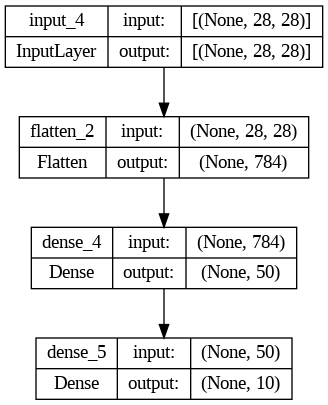

In [14]:
tf.keras.utils.plot_model(model,"image-classification_model.png",show_shapes=True)

In [16]:
model.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
#train
model.fit(train_mnist_features,y_mnist_train,validation_data=(test_mnist_features,y_mnist_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7903 - accuracy: 0.8004 - val_loss: 0.4061 - val_accuracy: 0.8920
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3804 - accuracy: 0.8935 - val_loss: 0.3275 - val_accuracy: 0.9079
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3285 - accuracy: 0.9064 - val_loss: 0.2980 - val_accuracy: 0.9170
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3010 - accuracy: 0.9150 - val_loss: 0.2820 - val_accuracy: 0.9187
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2815 - accuracy: 0.9205 - val_loss: 0.2648 - val_accuracy: 0.9242
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2653 - accuracy: 0.9250 - val_loss: 0.2490 - val_accuracy: 0.9282
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2519 - accuracy: 0.9283 - val_loss: 0.2375 - val_accuracy:

In [19]:
# Time Distributed
from keras.layers import TimeDistributed

In [21]:
input_sequences=tf.keras.Input(shape=(10,28,28))
processed_sequences=tf.keras.layers.TimeDistributed(model)(input_sequences)
processed_sequences

<KerasTensor: shape=(None, 10, 10) dtype=float32 (created by layer 'time_distributed')>

In [24]:
house_data_input=tf.keras.Input(shape=(128,),name="house_data")
x=tf.keras.layers.Dense(64,activation='relu')(house_data_input)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
block1_output=tf.keras.layers.Dense(32,activation='relu')(x)

house_pictures_input=tf.keras.Input(shape=(320,320,3),name="house_pictures")
y=tf.keras.layers.Conv2D(64,3,activation='relu',padding='same')(house_pictures_input)
y=tf.keras.layers.Conv2D(64,3,activation='relu',padding='same')(y)
flatten_layer_house=tf.keras.layers.Flatten()
block2_output=flatten_layer_house(y)

input_feature=tf.keras.layers.concatenate([block1_output,block2_output])

In [25]:
input_feature

<KerasTensor: shape=(None, 6553632) dtype=float32 (created by layer 'concatenate')>